<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/VisualizingCNNFilters%26FeatureMaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN acts like a black box wherein we give image as a input and we get desired output but what exactly is happening in between that we dont know.But we will get an idea as to how each layer treat our input layer in CNN architecture.Initial layers in CNN architectures tend to find premitive features like edges and as you go towards deeper layer our CNN model tend to find more detailed features.We will break the output of a perticular layer and see what that perticular layer giving us the output.We will use VGG16 pretrained model to visualize the partial output of CNN model.We will visualize the filter that is kernel and output of the convolution layer that is feature map.

In [10]:
from keras.applications.vgg16 import VGG16
model = VGG16()

In [11]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

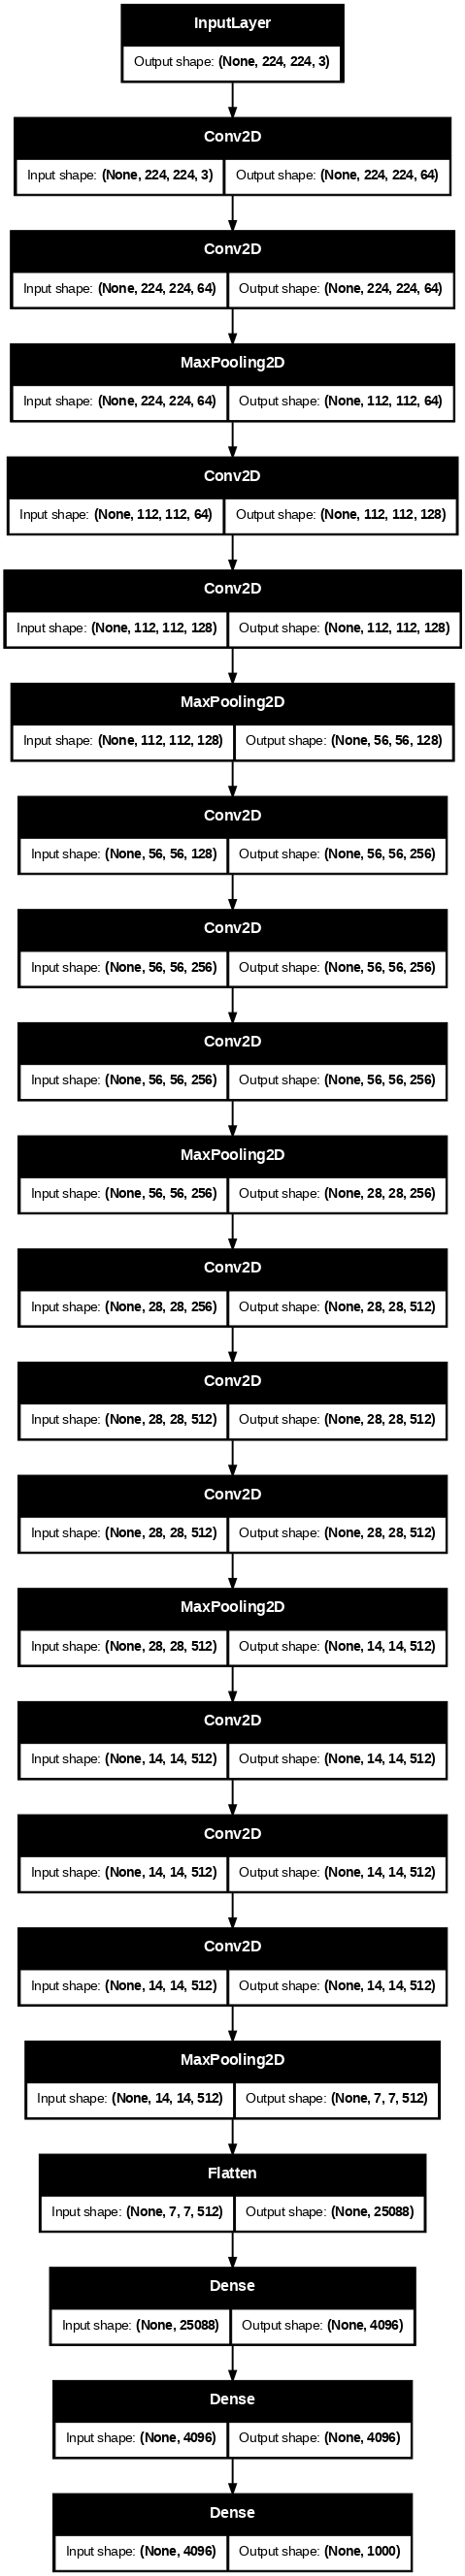

In [12]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, dpi=70)

In [13]:
#Now we will check whether our layer has conv word in it or not.
#Basically we want to know which is the convolution layer
for i in range(len(model.layers)):
  if 'conv' not in model.layers[i].name:
    continue
  filters,biases = model.layers[i].get_weights()
  print("Layer Number:",model.layers[i].name,filters.shape)

Layer Number: block1_conv1 (3, 3, 3, 64)
Layer Number: block1_conv2 (3, 3, 64, 64)
Layer Number: block2_conv1 (3, 3, 64, 128)
Layer Number: block2_conv2 (3, 3, 128, 128)
Layer Number: block3_conv1 (3, 3, 128, 256)
Layer Number: block3_conv2 (3, 3, 256, 256)
Layer Number: block3_conv3 (3, 3, 256, 256)
Layer Number: block4_conv1 (3, 3, 256, 512)
Layer Number: block4_conv2 (3, 3, 512, 512)
Layer Number: block4_conv3 (3, 3, 512, 512)
Layer Number: block5_conv1 (3, 3, 512, 512)
Layer Number: block5_conv2 (3, 3, 512, 512)
Layer Number: block5_conv3 (3, 3, 512, 512)


In [14]:
#Retrieve weights from the second hidden layer
filters,bias = model.layers[1].get_weights()

In [15]:
#Normalizing the filter values in 0 to 1 so that we can visyalize them
f_min,f_max = filters.min(),filters.max()
filters = (filters  - f_min) / (f_max - f_min)

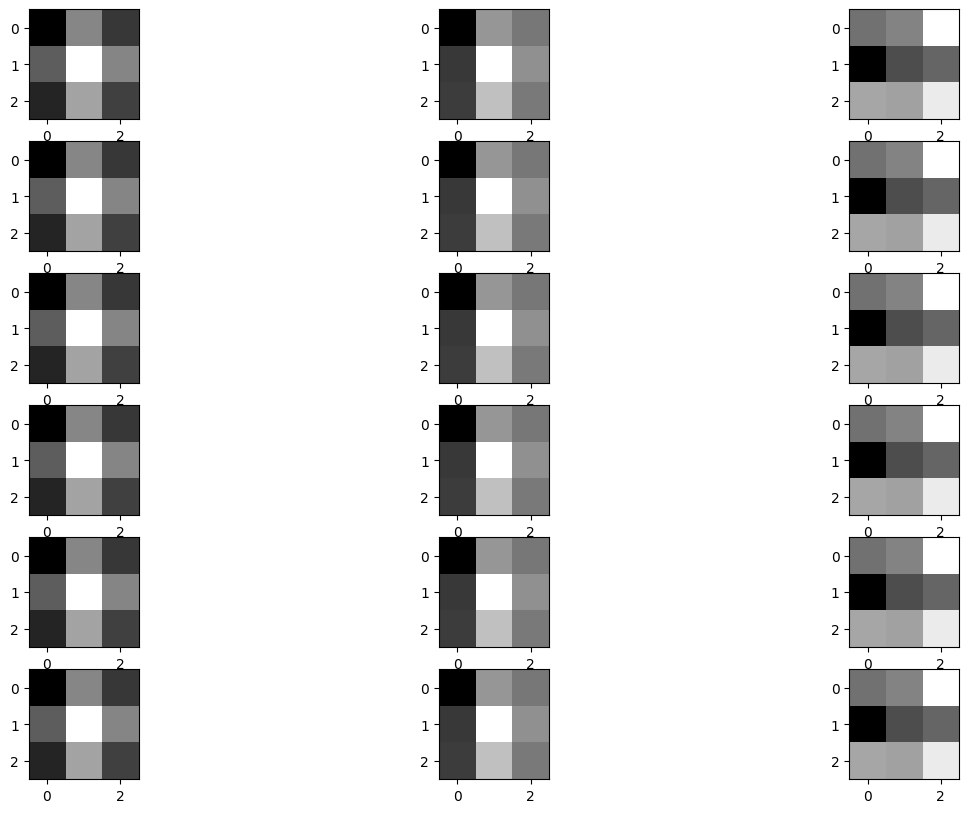

In [23]:
import matplotlib.pyplot as plt
n_filters = 6
ix=1
fig = plt.figure(figsize=(15,10))
for i in range(n_filters):
  f = filters[:,:,:,1]
  for j in range(3):
    #Subplot for 6 filters and 3 channels
    plt.subplot(n_filters,3,ix)
    plt.imshow(f[:,:,j],cmap = 'grey')
    ix+=1
plt.show()

So these are the filters used in VGG16 architecture.

Now we will pick any random image let Virat Kohli image and give this image to VGG16 model and we will print the output of each convolutional layer of this image.Basically we will be printing the feature map of convolution process output.

In [28]:
from tensorflow.keras.models import Model
model = Model(inputs=model.inputs , outputs=model.layers[1].output)

In [31]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

image = load_img("/content/vk.jpeg", target_size=(224, 224))

# Convert the image to an array
image = img_to_array(image)

# Expand dimensions so that it represents a single 'sample'
image = np.expand_dims(image, axis=0)

# Preprocess the image (required for some models like VGG16)
image = preprocess_input(image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


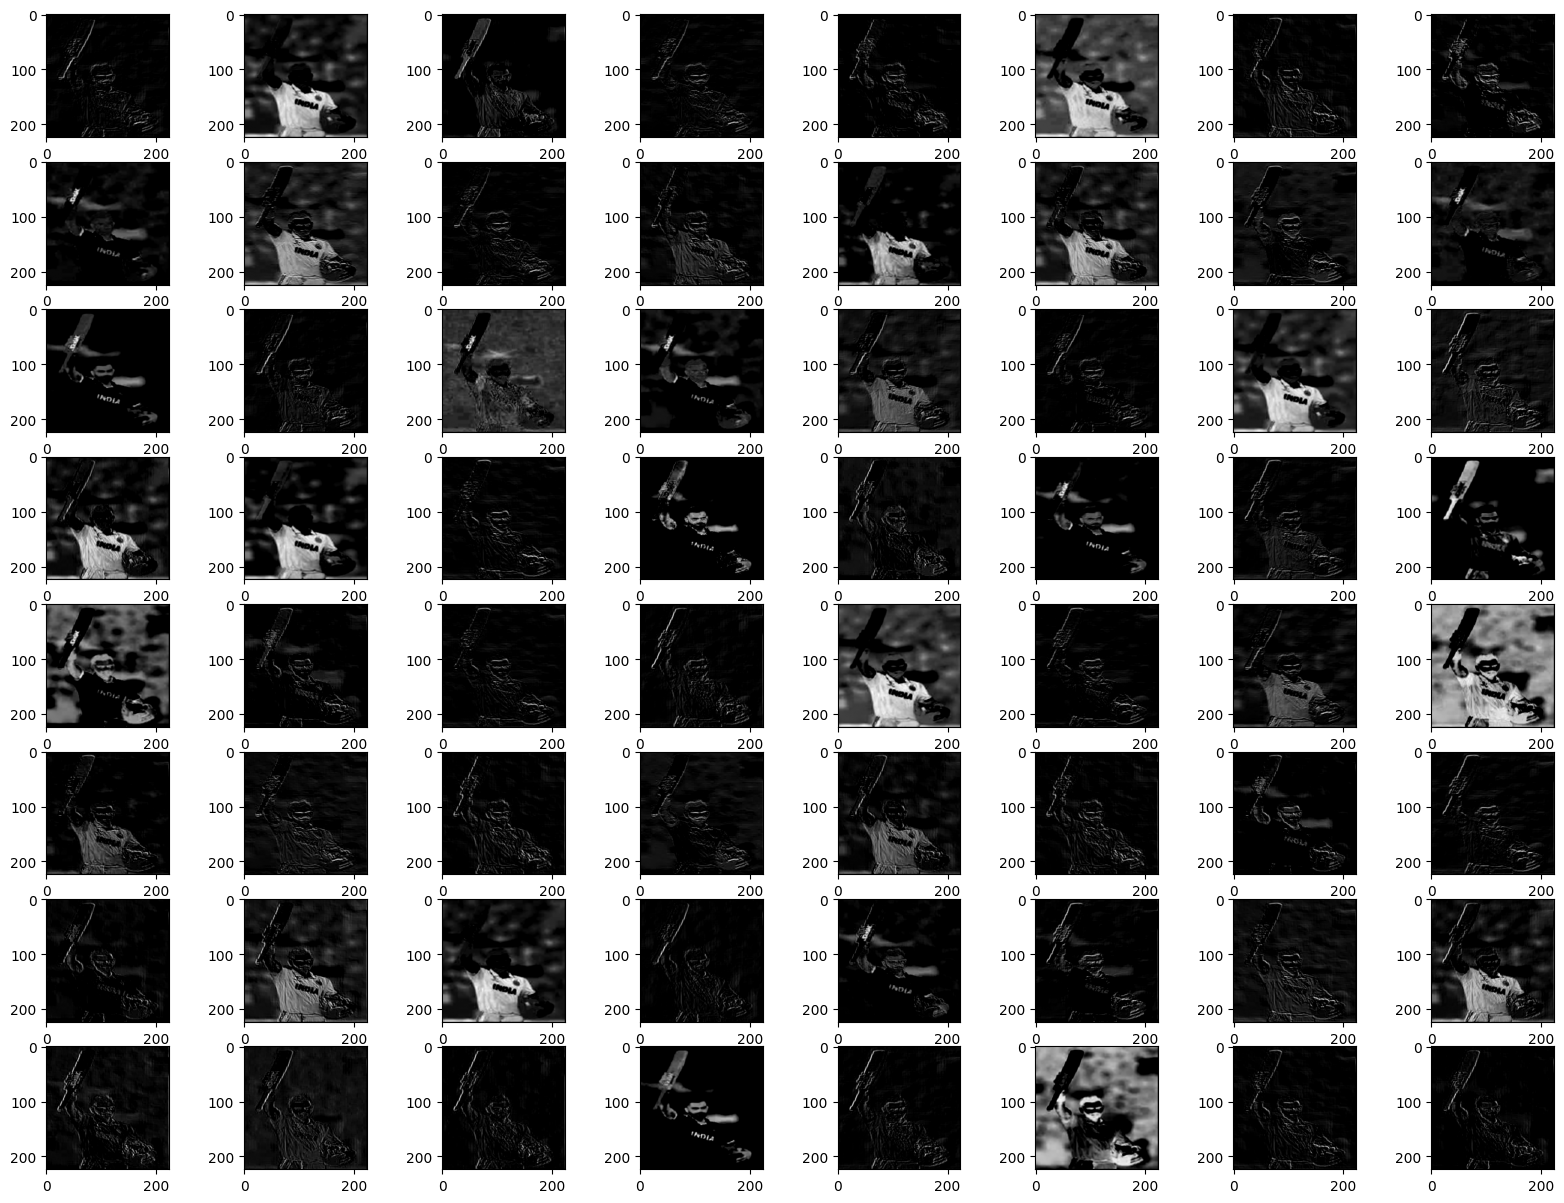

In [33]:
#calculating features_map
features = model.predict(image)

fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')

plt.show()

Here above we got 64 different images because we have 64 filters when the input image is passed through the first convolution layer.After passing through every filter we are getting the kind of diffeent image i.e. feature map.

In [34]:
model2 = VGG16()

In [35]:
layer_index = [ 2, 5 , 9 , 13 , 17]
outputs = [model2.layers[i].output for i in layer_index]

model3 = Model( inputs= model2.inputs, outputs = outputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


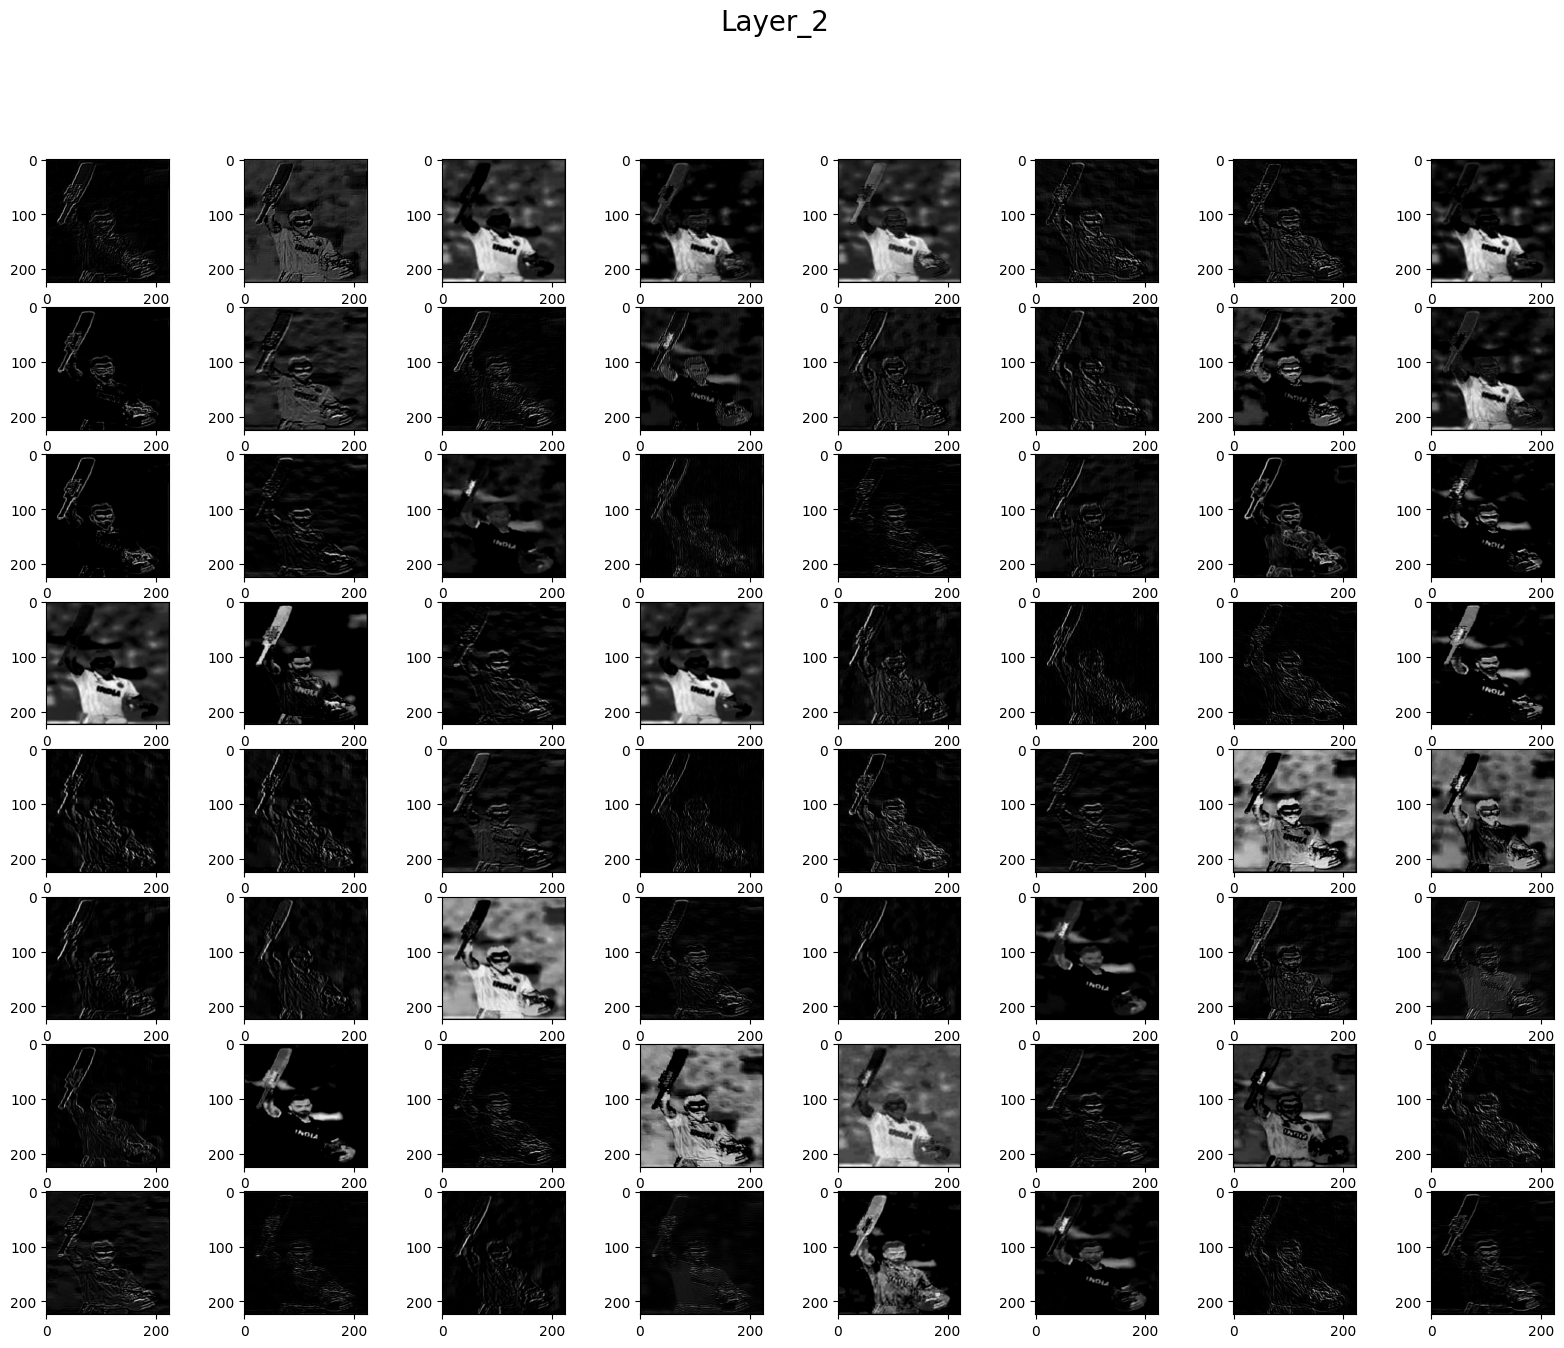

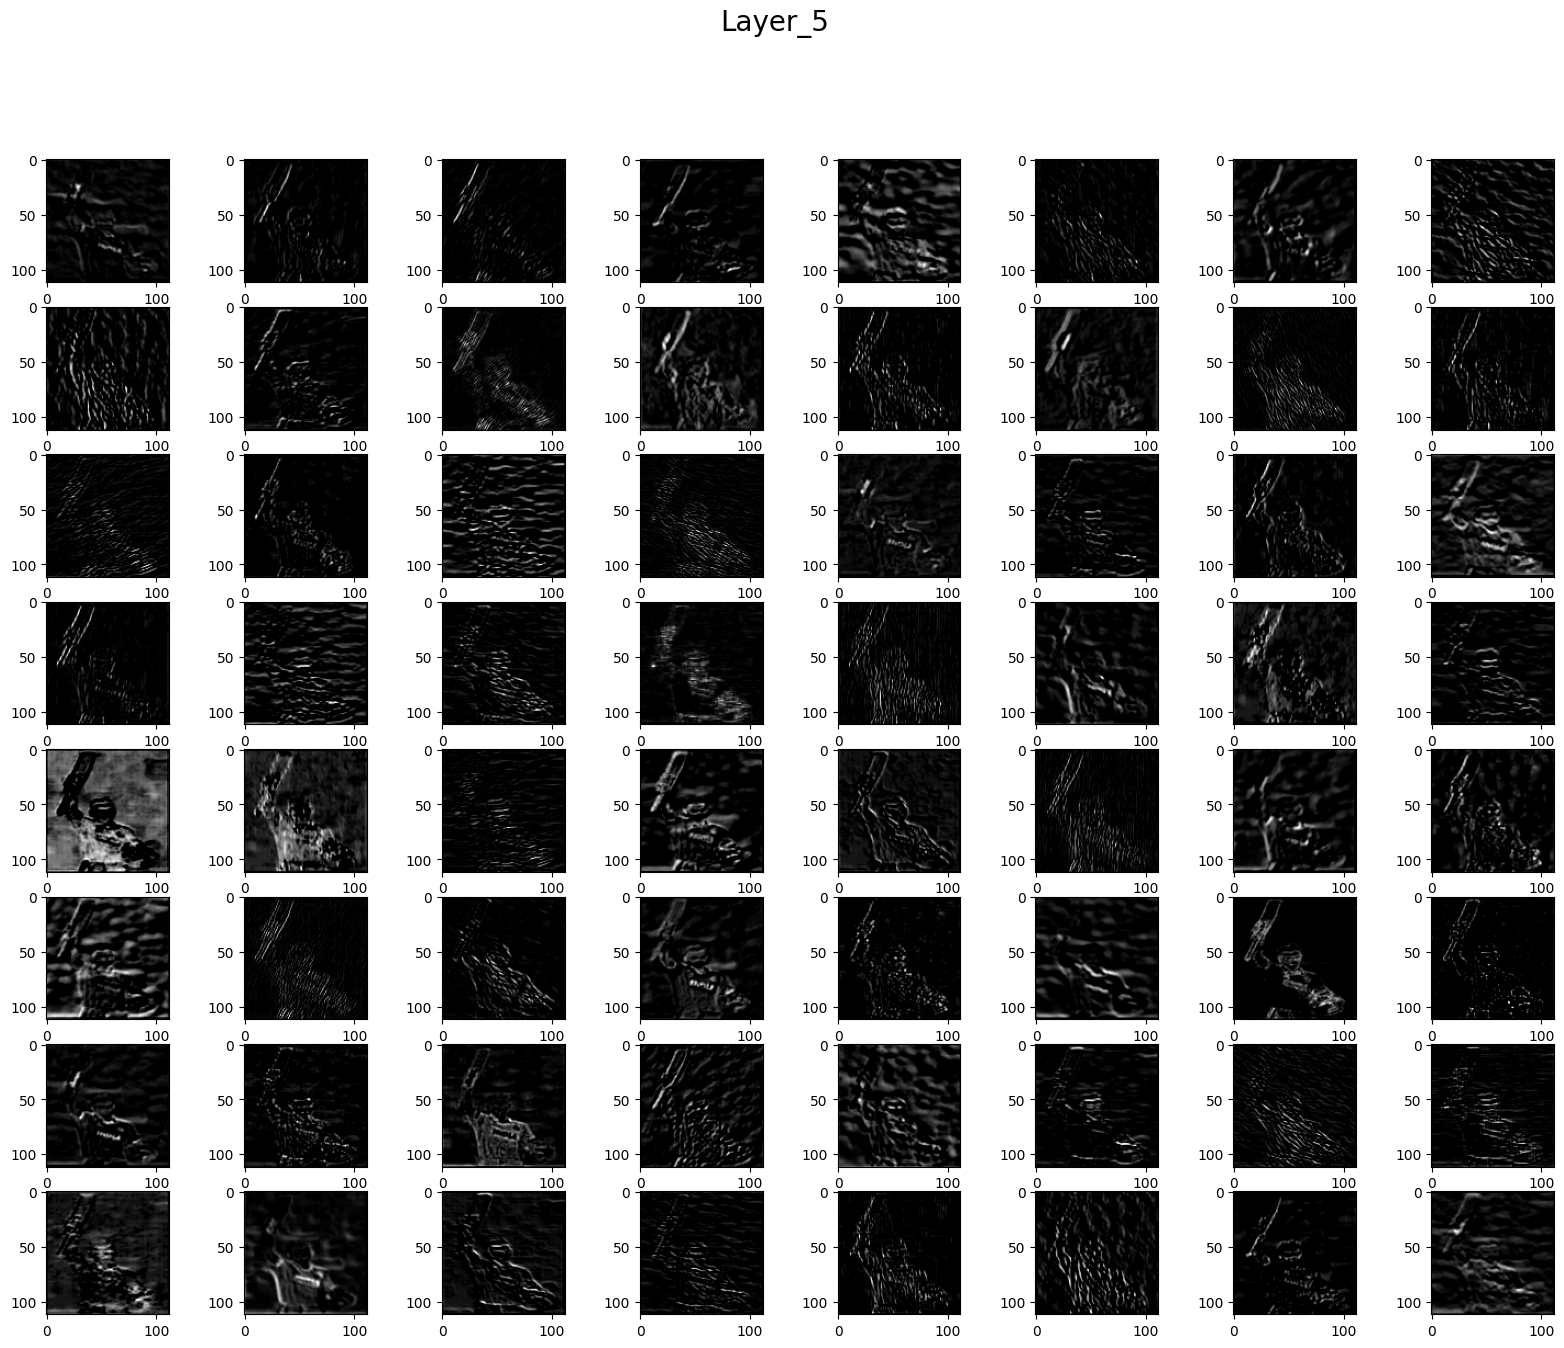

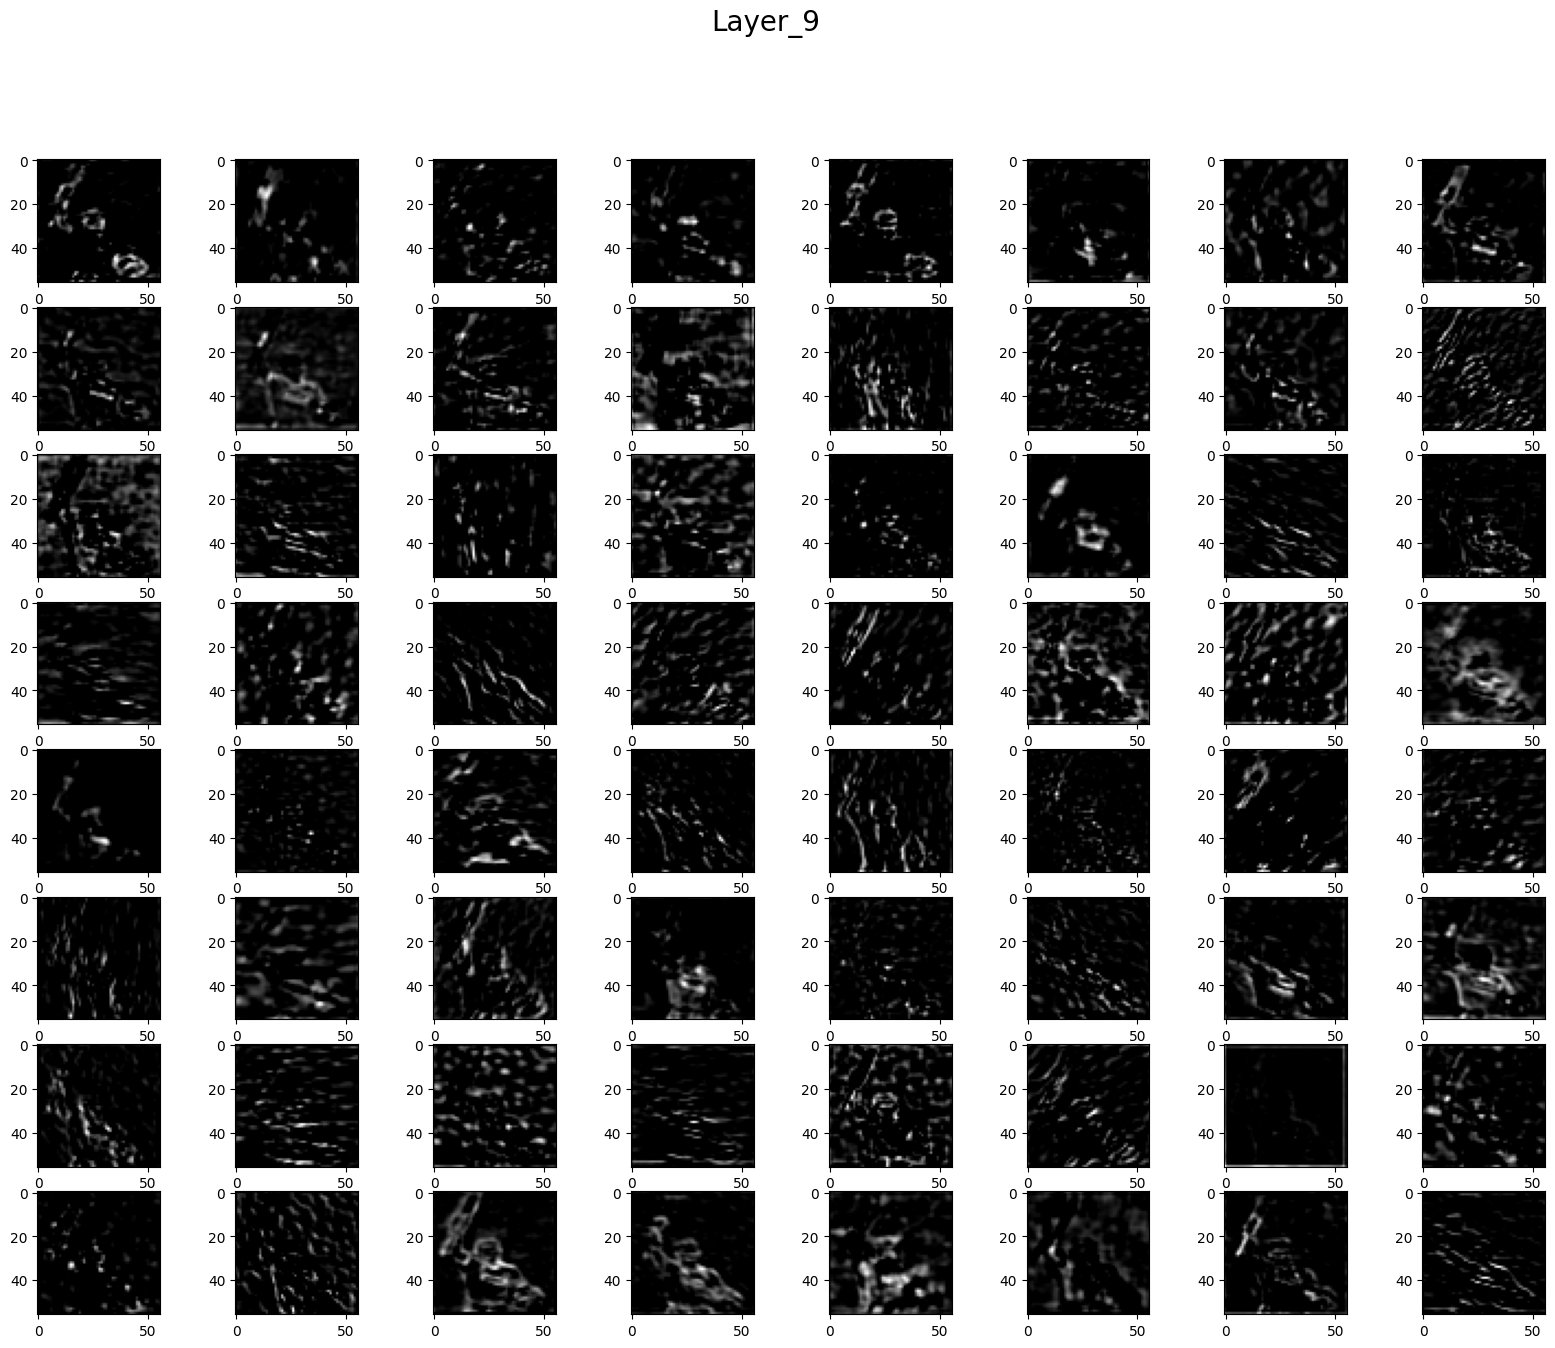

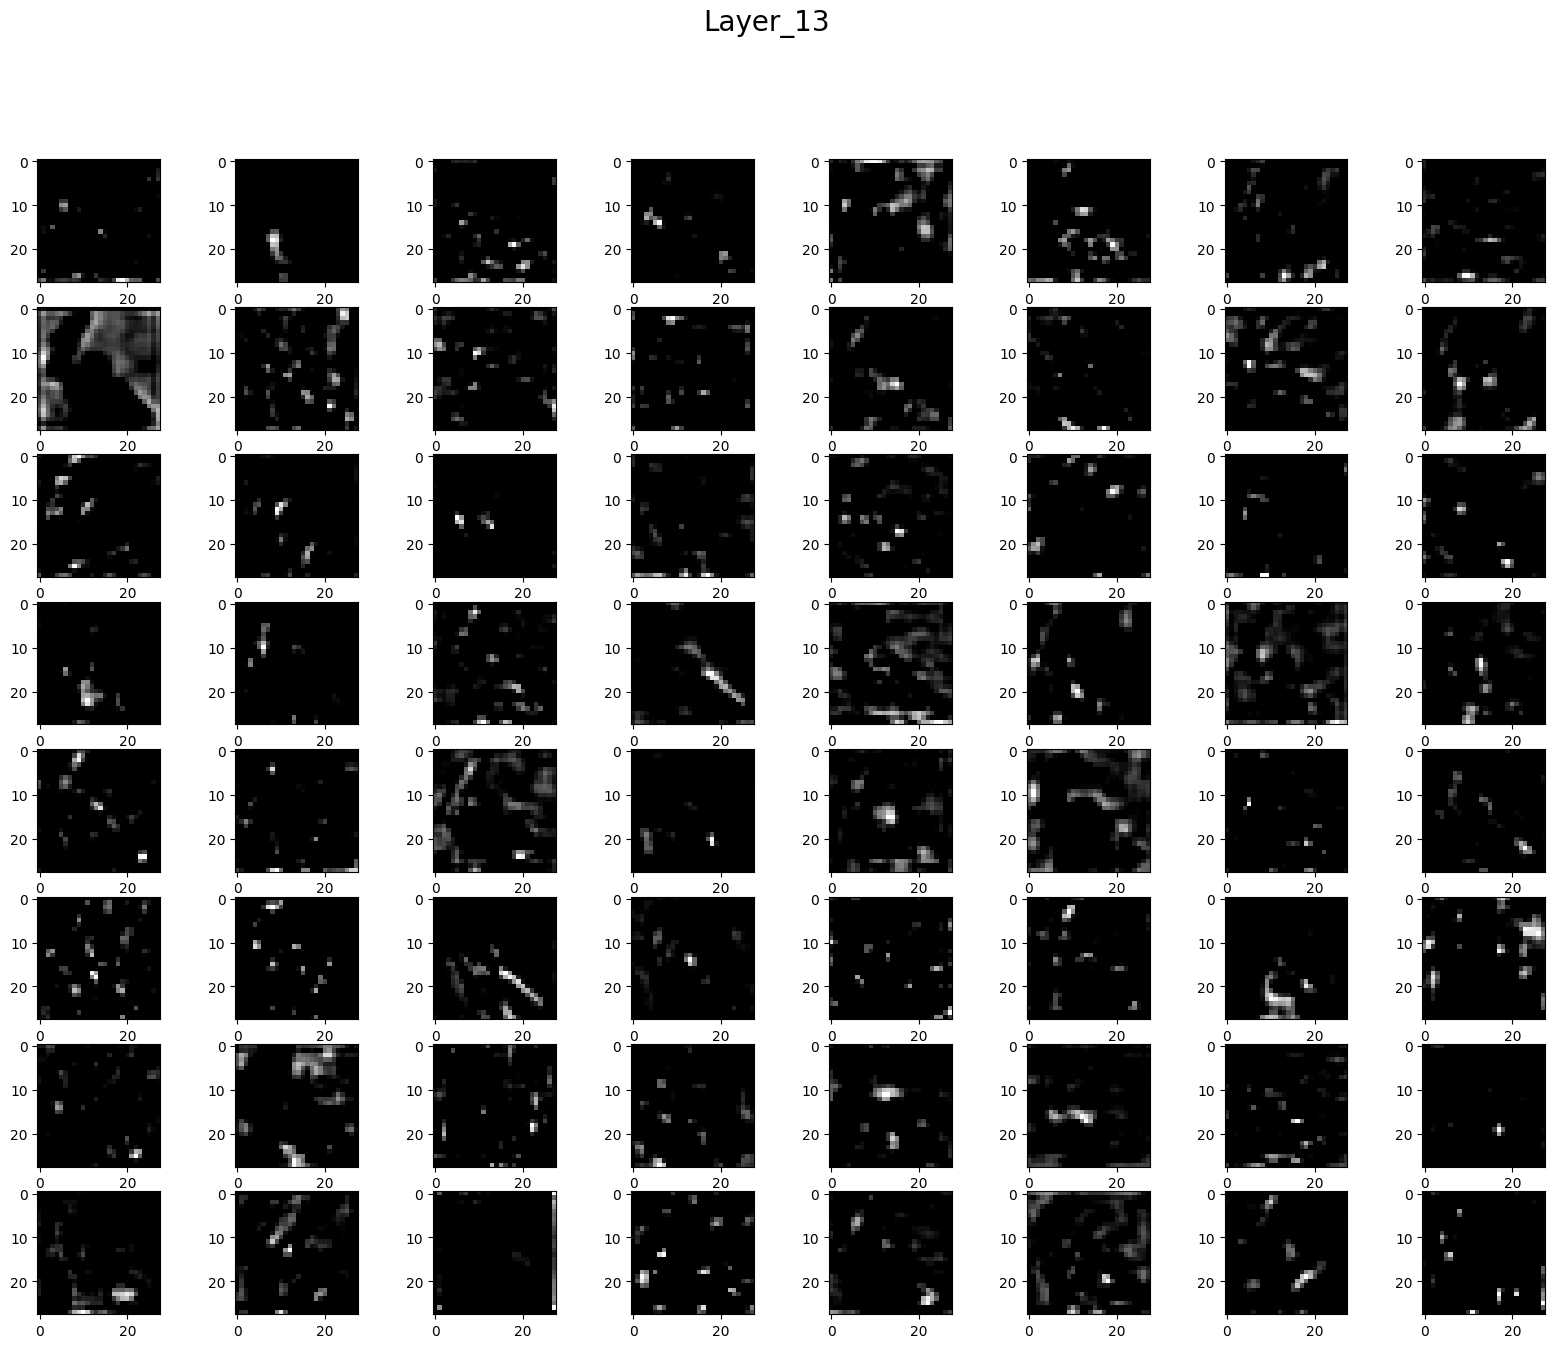

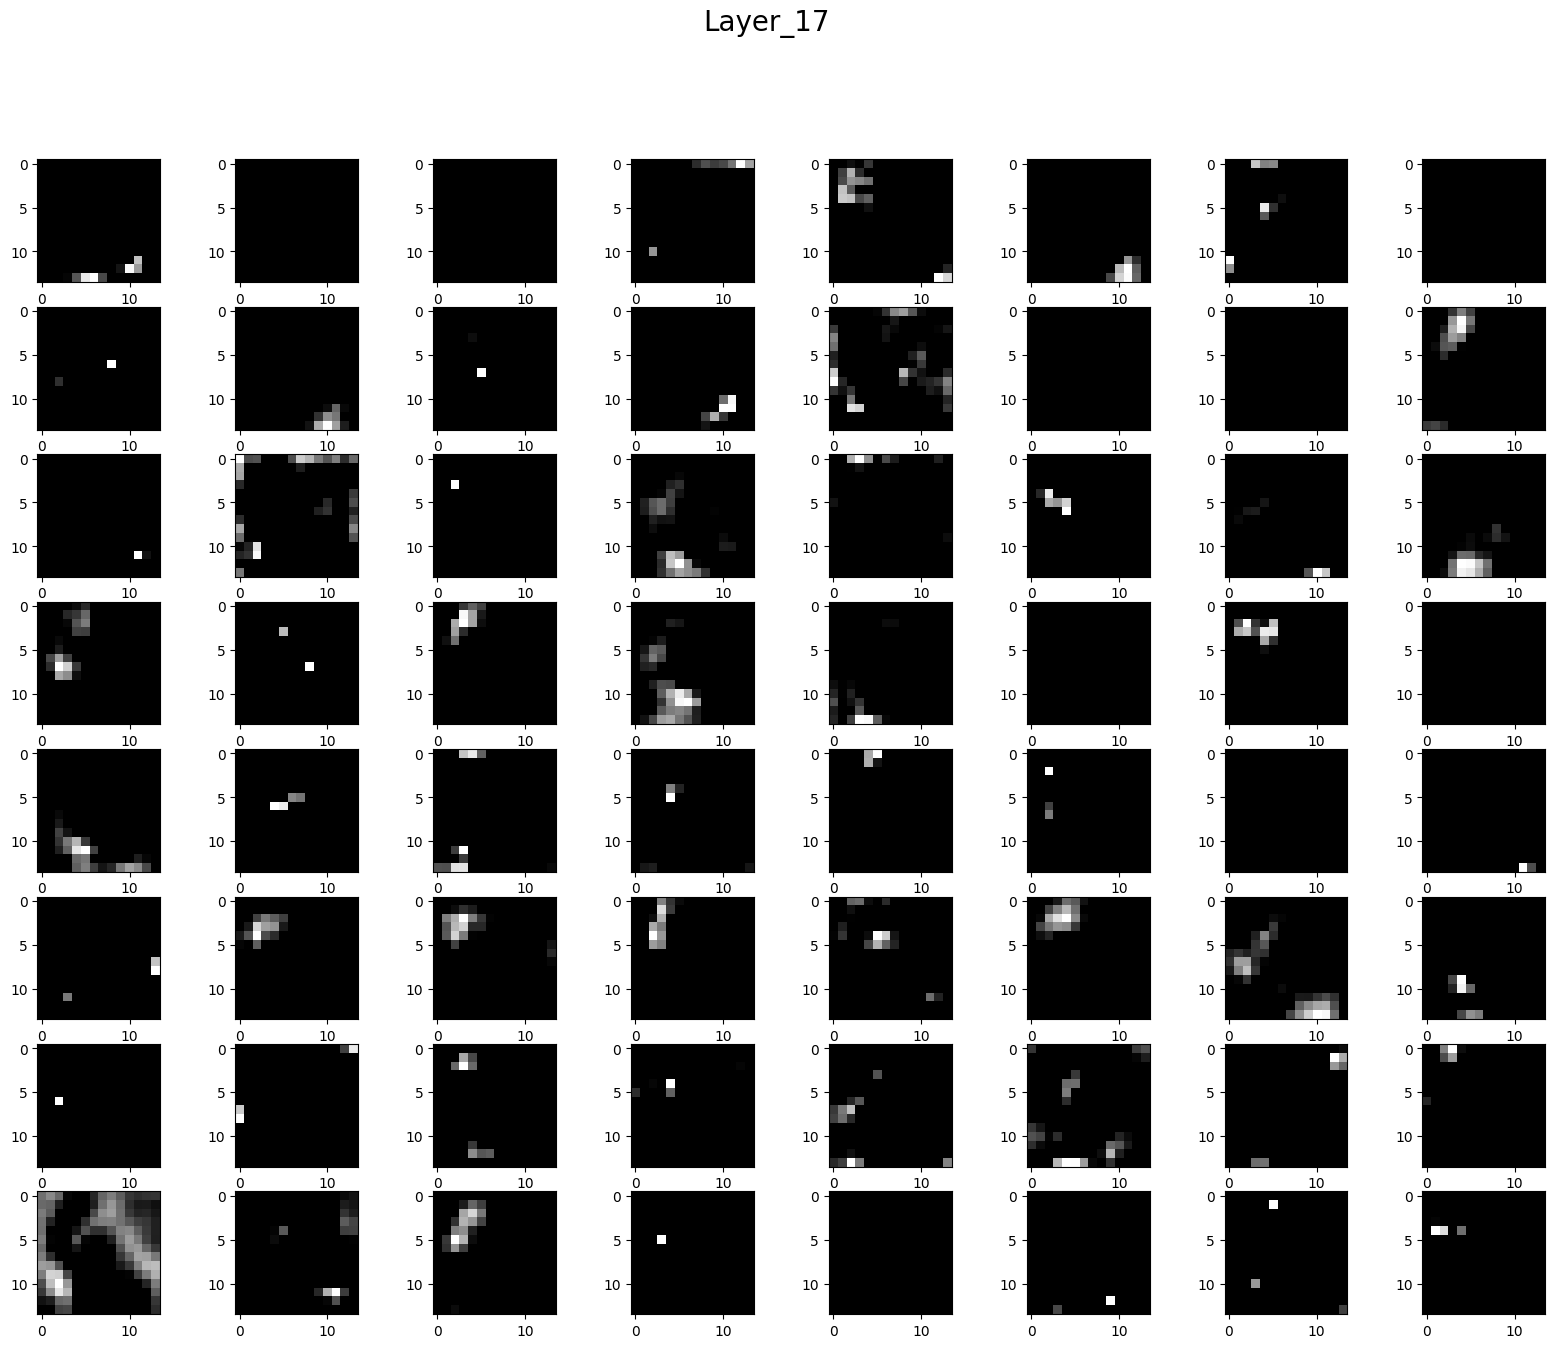

In [37]:
feature_map = model3.predict(image)

for i,fmap in zip(layer_index,feature_map):
    fig = plt.figure(figsize=(20,15))
    fig.suptitle("Layer_{}".format(i) , fontsize=20)
    for i in range(1,features.shape[3]+1):

        plt.subplot(8,8,i)
        plt.imshow(fmap[0,:,:,i-1] , cmap='gray')

plt.show()